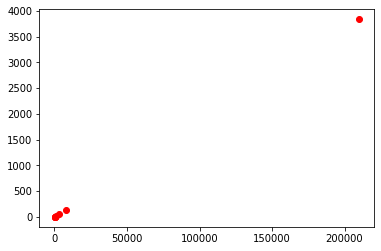

In [9]:
import numpy as np 
import matplotlib.pyplot as plt

# i = np.arange(5, 20, 5)
# size_len = i**3

i       = np.array([5, 6, 7, 8, 10, 15, 210000**(1/3), 20])
time_np = np.array([1.03, 2.07, 3.76, 5.98, 12.50, 52.03, 64*60, 133.29]) # just in numpy array and on cpu, no parallel
volexs  = i**3
time_taichi = np.array([])


fig = plt.figure()
ax = fig.gca()
ax.plot(volexs, time_np, 'ro')
plt.show()

In [12]:
from numba import jit, prange
@jit(nopython=True, fastmath=True, nogil=True,  parallel=True)
def bilinear_interpolation(f_in, resampleFactor):
    x_in = np.linspace(0, f_in.shape[0]-1, f_in.shape[0])
    y_in = np.linspace(0, f_in.shape[1]-1, f_in.shape[1])
    x_out = np.linspace(0, f_in.shape[0]-1, f_in.shape[0]*resampleFactor)
    y_out = np.linspace(0, f_in.shape[1]-1, f_in.shape[1]*resampleFactor)
    f_out = np.zeros((y_out.size, x_out.size))
    
    for i in prange(f_out.shape[1]):
        idx = np.searchsorted(x_in[2:-2], x_out[i])
        
        x1 = x_in[idx-1]
        x2 = x_in[idx]
        x = x_out[i]
        
        for j in prange(f_out.shape[0]):
            idy = np.searchsorted(y_in[2:-2], y_out[j])
            y1 = y_in[idy-1]
            y2 = y_in[idy]
            y = y_out[j]

            
            f11 = f_in[idy-1, idx-1]
            f21 = f_in[idy-1, idx]
            f12 = f_in[idy, idx-1]
            f22 = f_in[idy, idx]
            

            
            f_out[j, i] = ((f11 * (x2 - x) * (y2 - y) +
                            f21 * (x - x1) * (y2 - y) +
                            f12 * (x2 - x) * (y - y1) +
                            f22 * (x - x1) * (y - y1)) /
                           ((x2 - x1) * (y2 - y1)))
    
    return f_out

In [18]:
import numpy as np

test_array = np.linspace(0, 99, 20).reshape(5, 4)
print(test_array)
test_out = bilinear_interpolation(test_array, 3)
print(test_out.T)
    

[[ 0.          5.21052632 10.42105263 15.63157895]
 [20.84210526 26.05263158 31.26315789 36.47368421]
 [41.68421053 46.89473684 52.10526316 57.31578947]
 [62.52631579 67.73684211 72.94736842 78.15789474]
 [83.36842105 88.57894737 93.78947368 99.        ]]
[[ -0.           7.57894737  15.15789474  22.73684211  30.31578947
   37.89473684  45.47368421  53.05263158  60.63157895  68.21052632
   75.78947368  83.36842105]
 [  1.11654135   8.69548872  16.27443609  23.85338346  31.43233083
   39.0112782   46.59022556  54.16917293  61.7481203   69.32706767
   76.90601504  84.48496241]
 [  2.23308271   9.81203008  17.39097744  24.96992481  32.54887218
   40.12781955  47.70676692  55.28571429  62.86466165  70.44360902
   78.02255639  85.60150376]
 [  3.34962406  10.92857143  18.5075188   26.08646617  33.66541353
   41.2443609   48.82330827  56.40225564  63.98120301  71.56015038
   79.13909774  86.71804511]
 [  4.46616541  12.04511278  19.62406015  27.20300752  34.78195489
   42.36090226  49.939849

In [15]:
test_out.shape

(6, 15)

In [16]:
test_array.shape
    




(5, 2)